In [40]:
# load in the packages you will need for your analysis
import pandas as pd # import pandas for data analysis and manipulation
import seaborn as sns # import seaborn for data visualization
import matplotlib.pyplot as plt #import matplot  - just in case
import cartopy as ct #import cartopy - just in case

In [68]:
# load in the csv file with coastal cleanup data

infile = 'C:/Users/zacha/Dropbox/PhD ODU/Courses/Spring 2023/OEAS895/International_Coastal_Cleanup.csv'

In [69]:
# read in the .csv file with the column separator explicitly defined

data = pd.read_csv(infile, sep = ',')

In [5]:
# print the information about the data in the dataframe

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Area                                       69 non-null     object 
 1   Date                                       69 non-null     object 
 2   Cigarette Butts                            69 non-null     object 
 3   Food Wrappers (candy, chips, etc.)         69 non-null     object 
 4   Take Out/Away Containers (Plastic)         69 non-null     int64  
 5   Take Out/Away Containers (Foam)            69 non-null     int64  
 6   Bottle Caps (Plastic)                      69 non-null     int64  
 7   Bottle Caps (Metal)                        69 non-null     object 
 8   Lids (Plastic)                             69 non-null     int64  
 9   Straws, Stirrers                           69 non-null     int64  
 10  Forks, Knives, Spoons       

In [101]:
# Keep in mind some of the columns are being loaded as objects - will need to change later

# Look for NAs
data.isna().sum()

Area                                         0
Date                                         0
Cigarette Butts                              0
Food Wrappers (candy, chips, etc.)           0
Take Out/Away Containers (Plastic)           0
Take Out/Away Containers (Foam)              0
Bottle Caps (Plastic)                        0
Bottle Caps (Metal)                          0
Lids (Plastic)                               0
Straws, Stirrers                             0
Forks, Knives, Spoons                        0
Beverage Bottles (Plastic)                   0
Beverage Bottles (Glass)                     0
Beverage Cans                                0
Grocery Bags (Plastic)                       0
Other Plastic Bags                           0
Paper Bags                                   0
Cups, Plates (Paper)                         0
Cups, Plates (Plastic)                       0
Cups, Plates (Foam)                          0
Fishing Buoys, Pots & Traps                  0
Fishing Net &

In [102]:
# No "NA"s so look for zeros
# Look for all the zeros 
(data == 0).sum()

Area                                          0
Date                                          0
Cigarette Butts                               0
Food Wrappers (candy, chips, etc.)            0
Take Out/Away Containers (Plastic)           11
Take Out/Away Containers (Foam)              17
Bottle Caps (Plastic)                         4
Bottle Caps (Metal)                           0
Lids (Plastic)                               10
Straws, Stirrers                              4
Forks, Knives, Spoons                        11
Beverage Bottles (Plastic)                    5
Beverage Bottles (Glass)                      0
Beverage Cans                                 8
Grocery Bags (Plastic)                        9
Other Plastic Bags                           15
Paper Bags                                   31
Cups, Plates (Paper)                         18
Cups, Plates (Plastic)                       13
Cups, Plates (Foam)                          22
Fishing Buoys, Pots & Traps             

In [7]:
# Appears there were 4 coastal cleanup events were nobody showed up

# Explore the shape of the data
# nrows, ncols

data.shape

(69, 53)

In [8]:
# Appears to be 69 rows - but keep in mind 4 of these contain essentially blank data

# Explore the total number of datapoints in the dataframe
# ncol * nrows

data.size

3657

In [6]:
# Look at the different columns within the dataset

data.columns

Index(['Area', 'Date', 'Cigarette Butts', 'Food Wrappers (candy, chips, etc.)',
       'Take Out/Away Containers (Plastic)', 'Take Out/Away Containers (Foam)',
       'Bottle Caps (Plastic)', 'Bottle Caps (Metal)', 'Lids (Plastic)',
       'Straws, Stirrers', 'Forks, Knives, Spoons',
       'Beverage Bottles (Plastic)', 'Beverage Bottles (Glass)',
       'Beverage Cans', 'Grocery Bags (Plastic)', 'Other Plastic Bags',
       'Paper Bags', 'Cups, Plates (Paper)', 'Cups, Plates (Plastic)',
       'Cups, Plates (Foam)', 'Fishing Buoys, Pots & Traps',
       'Fishing Net & Pieces', 'Fishing Line (1 yard/meter = 1 piece)',
       'Rope (1 yard/meter = 1 piece)', 'Fishing Gear (Clean Swell)',
       '6-Pack Holders', 'Other Plastic/Foam Packaging',
       'Other Plastic Bottles (oil, bleach, etc.)', 'Strapping Bands',
       'Tobacco Packaging/Wrap', 'Other Packaging (Clean Swell)',
       'Appliances (refrigerators, washers, etc.)', 'Balloons', 'Cigar Tips',
       'Cigarette Lighters', 'Co

In [17]:
# descriptive statistics for the numeric data in the dataframe

data.describe()

,Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Lids (Plastic),"Straws, Stirrers","Forks, Knives, Spoons",Beverage Bottles (Plastic),Beverage Cans,Grocery Bags (Plastic),Other Plastic Bags,...,Toys,Other Trash (Clean Swell),Condoms,Diapers,Syringes,Tampons/Tampon Applicators,Foam Pieces,Number of Volunteers,Volunteer Hours,Number of Miles
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,18.666667,13.811594,103.521739,23.000000,52.797101,14.434783,71.608696,45.840580,40.173913,38.188406,...,0.188406,20.811594,1.942029,1.362319,0.405797,0.985507,66.000000,19.695652,39.384058,1.556232
std,22.649936,19.147474,155.625740,26.805948,63.438386,21.083502,96.149733,58.140707,62.317016,81.004407,...,0.911937,70.832295,4.415494,3.929418,1.019210,2.219517,133.862528,28.556602,59.830099,1.540931
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,17.000000,6.000000,11.000000,1.000000,14.000000,6.000000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,9.000000,1.000000
50%,8.000000,6.000000,43.000000,13.000000,26.000000,7.000000,37.000000,26.000000,17.000000,10.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,11.000000,20.000000,1.000000
75%,31.000000,21.000000,112.000000,31.000000,73.000000,20.000000,70.000000,69.000000,44.000000,34.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,58.000000,23.000000,43.500000,2.000000
max,90.000000,106.000000,780.000000,109.000000,368.000000,136.000000,395.000000,276.000000,326.000000,542.000000,...,7.000000,441.000000,33.000000,24.000000,7.000000,14.000000,750.000000,178.000000,396.000000,10.000000


In [209]:
# Only loading in 42 columns because some of these are objects - will change later for relevant columns

# get a list of the unique Areas cleanups occurred
data['Area'].unique()

# assign the list of unique Areas to a new variable called 'Areas'
Areas = data['Area'].unique()

In [16]:
#Find how many unique areas
Areas.shape

(39,)

In [211]:
#39 unique areas where coast cleanips occurred
# Group by Area and Number of Volunteers to look at how many volunteers typically showed up to each area

data.groupby('Area')['Number of Volunteers'].unique()

Area
100 East Ocean View Ave                                                                      [5]
Admiral Taussig Boulevard (Granby Street - East Little Creek Boulevard)                     [10]
Barraud Park                                                               [35, 87, 29, 39, 132]
Bay Dunes Drive                                                                              [3]
Bayview Elememtary                                                                          [26]
Bayview Elementary/East Bayview Boulevard                                            [5, 12, 14]
Beach (21st Bay Street - 30th Bay Street)                                                    [5]
Beach (Cottage Place Beach - North Beach View)                                               [9]
Community Beach Park                                                                         [3]
Curlew Drive (Feeder Road - Light Rail Station)                                              [0]
East Ocean View          

In [214]:
## Now look at the mean for each

data.groupby('Area')['Number of Volunteers'].mean()

Area
100 East Ocean View Ave                                                      5.000000
Admiral Taussig Boulevard (Granby Street - East Little Creek Boulevard)     10.000000
Barraud Park                                                                64.400000
Bay Dunes Drive                                                              3.000000
Bayview Elememtary                                                          26.000000
Bayview Elementary/East Bayview Boulevard                                   10.333333
Beach (21st Bay Street - 30th Bay Street)                                    5.000000
Beach (Cottage Place Beach - North Beach View)                               9.000000
Community Beach Park                                                         3.000000
Curlew Drive (Feeder Road - Light Rail Station)                              0.000000
East Ocean View                                                             12.666667
East Ocean View (1300 - 1800 Block)              

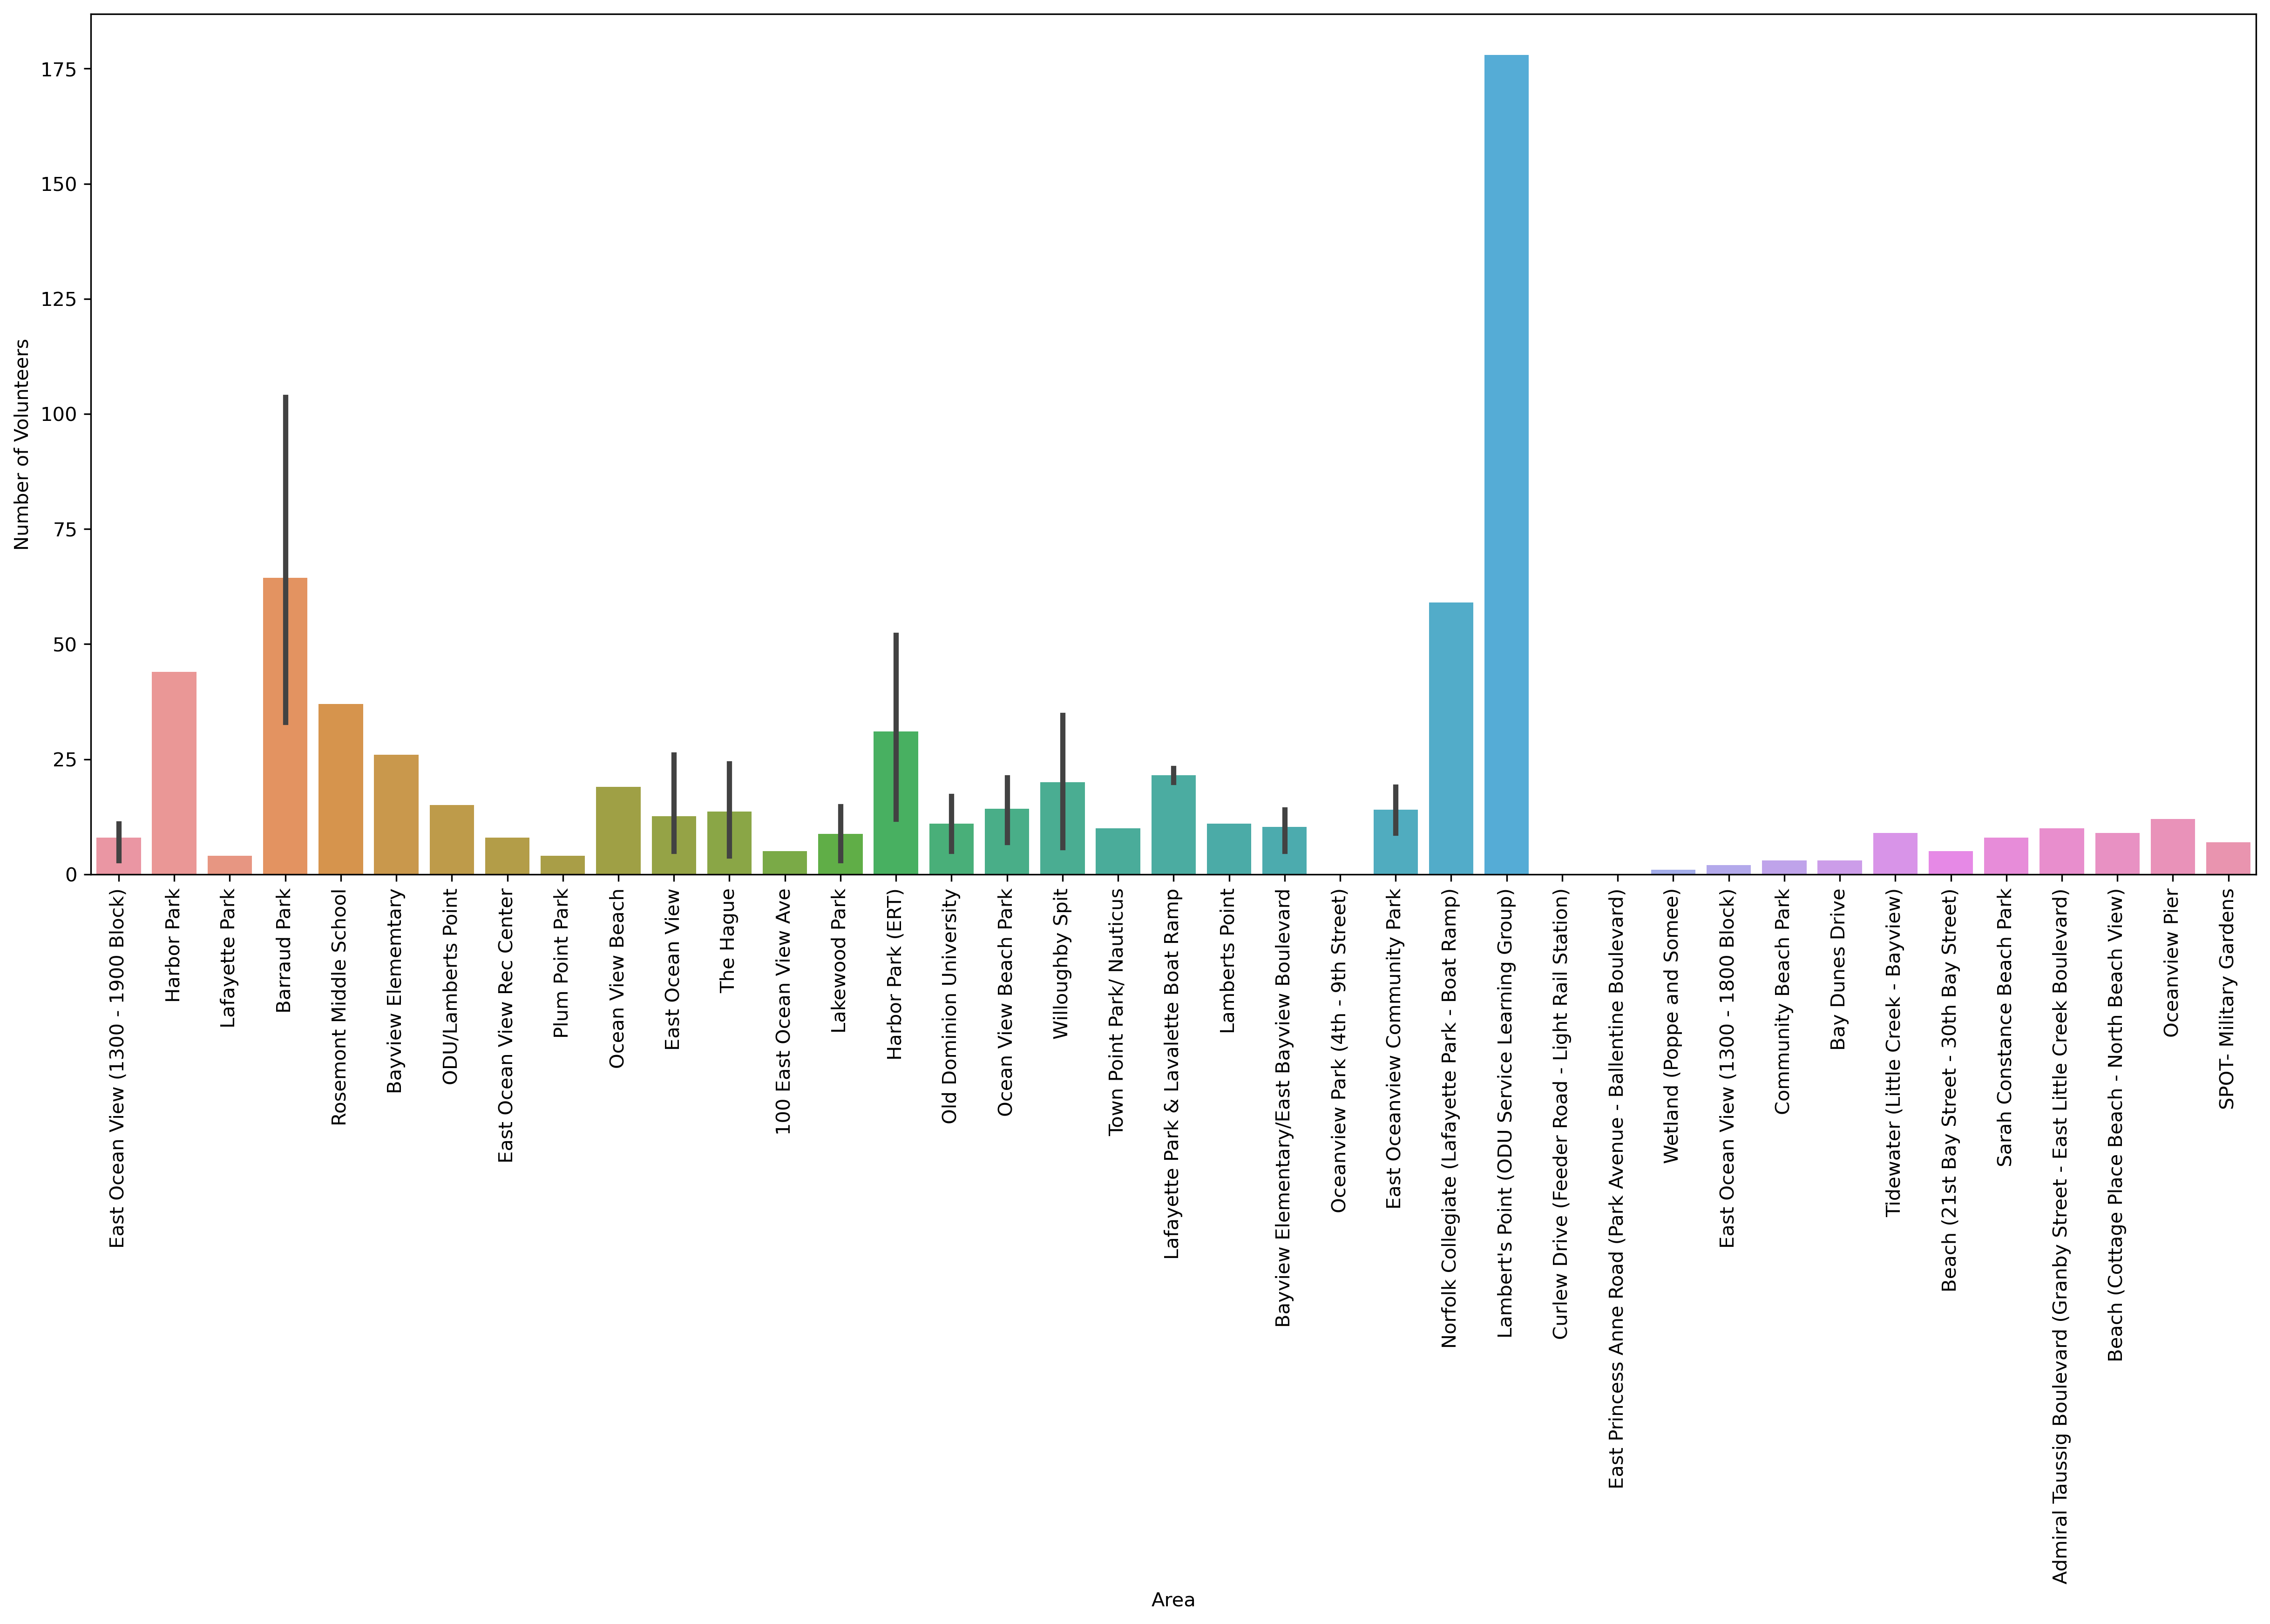

In [19]:
# Looks like a high amount of variation between cleanup events
# Plot Area and Number of volunteers to look at this more closely

fig, ax = plt.subplots(1, figsize = (20,8), dpi = 300)

sns.barplot(data = data, x = 'Area', y = 'Number of Volunteers')
ax.tick_params(axis='x', rotation=90)

In [43]:
# Group by Area and Total Pounds of Litter Collected to look at how much trash was typically removed from each area

data.groupby('Area')['Total Pounds of Litter Collected'].unique()

Area
100 East Ocean View Ave                                                                            [20]
Admiral Taussig Boulevard (Granby Street - East Little Creek Boulevard)                            [60]
Barraud Park                                                               [15, 1,100, 120, 295, 2,545]
Bay Dunes Drive                                                                                    [60]
Bayview Elememtary                                                                                 [25]
Bayview Elementary/East Bayview Boulevard                                                  [20, 50, 80]
Beach (21st Bay Street - 30th Bay Street)                                                          [90]
Beach (Cottage Place Beach - North Beach View)                                                    [200]
Community Beach Park                                                                               [12]
Curlew Drive (Feeder Road - Light Rail Station)            

In [29]:
# Examine 'Total Pounds of Litter Collected'
data['Total Pounds of Litter Collected'].describe

<bound method NDFrame.describe of 0        70
1        20
2         0
3        15
4         2
      ...  
64       90
65      240
66      180
67    1,460
68    1,150
Name: Total Pounds of Litter Collected, Length: 69, dtype: object>

In [70]:
# This column and a few others are not being recognized as intergers because of commas 
# Remove commas
data_no_commas = data.replace(',','', regex=True)

In [71]:
# Ensure commas have been removed
data_no_commas['Total Pounds of Litter Collected'].describe

<bound method NDFrame.describe of 0       70
1       20
2        0
3       15
4        2
      ... 
64      90
65     240
66     180
67    1460
68    1150
Name: Total Pounds of Litter Collected, Length: 69, dtype: object>

In [72]:
# Switch column to interger now 
data_no_commas['Total Pounds of Litter Collected'] = pd.to_numeric(data_no_commas['Total Pounds of Litter Collected'])

In [216]:
# Now look at mean
data_no_commas.groupby('Area')['Total Pounds of Litter Collected'].mean()

Area
100 East Ocean View Ave                                                      20.000000
Admiral Taussig Boulevard (Granby Street - East Little Creek Boulevard)      60.000000
Barraud Park                                                                815.000000
Bay Dunes Drive                                                              60.000000
Bayview Elememtary                                                           25.000000
Bayview Elementary/East Bayview Boulevard                                    50.000000
Beach (21st Bay Street - 30th Bay Street)                                    90.000000
Beach (Cottage Place Beach - North Beach View)                              200.000000
Community Beach Park                                                         12.000000
Curlew Drive (Feeder Road - Light Rail Station)                               0.000000
East Ocean View                                                             118.333333
East Ocean View (1300 - 1800 Block)   

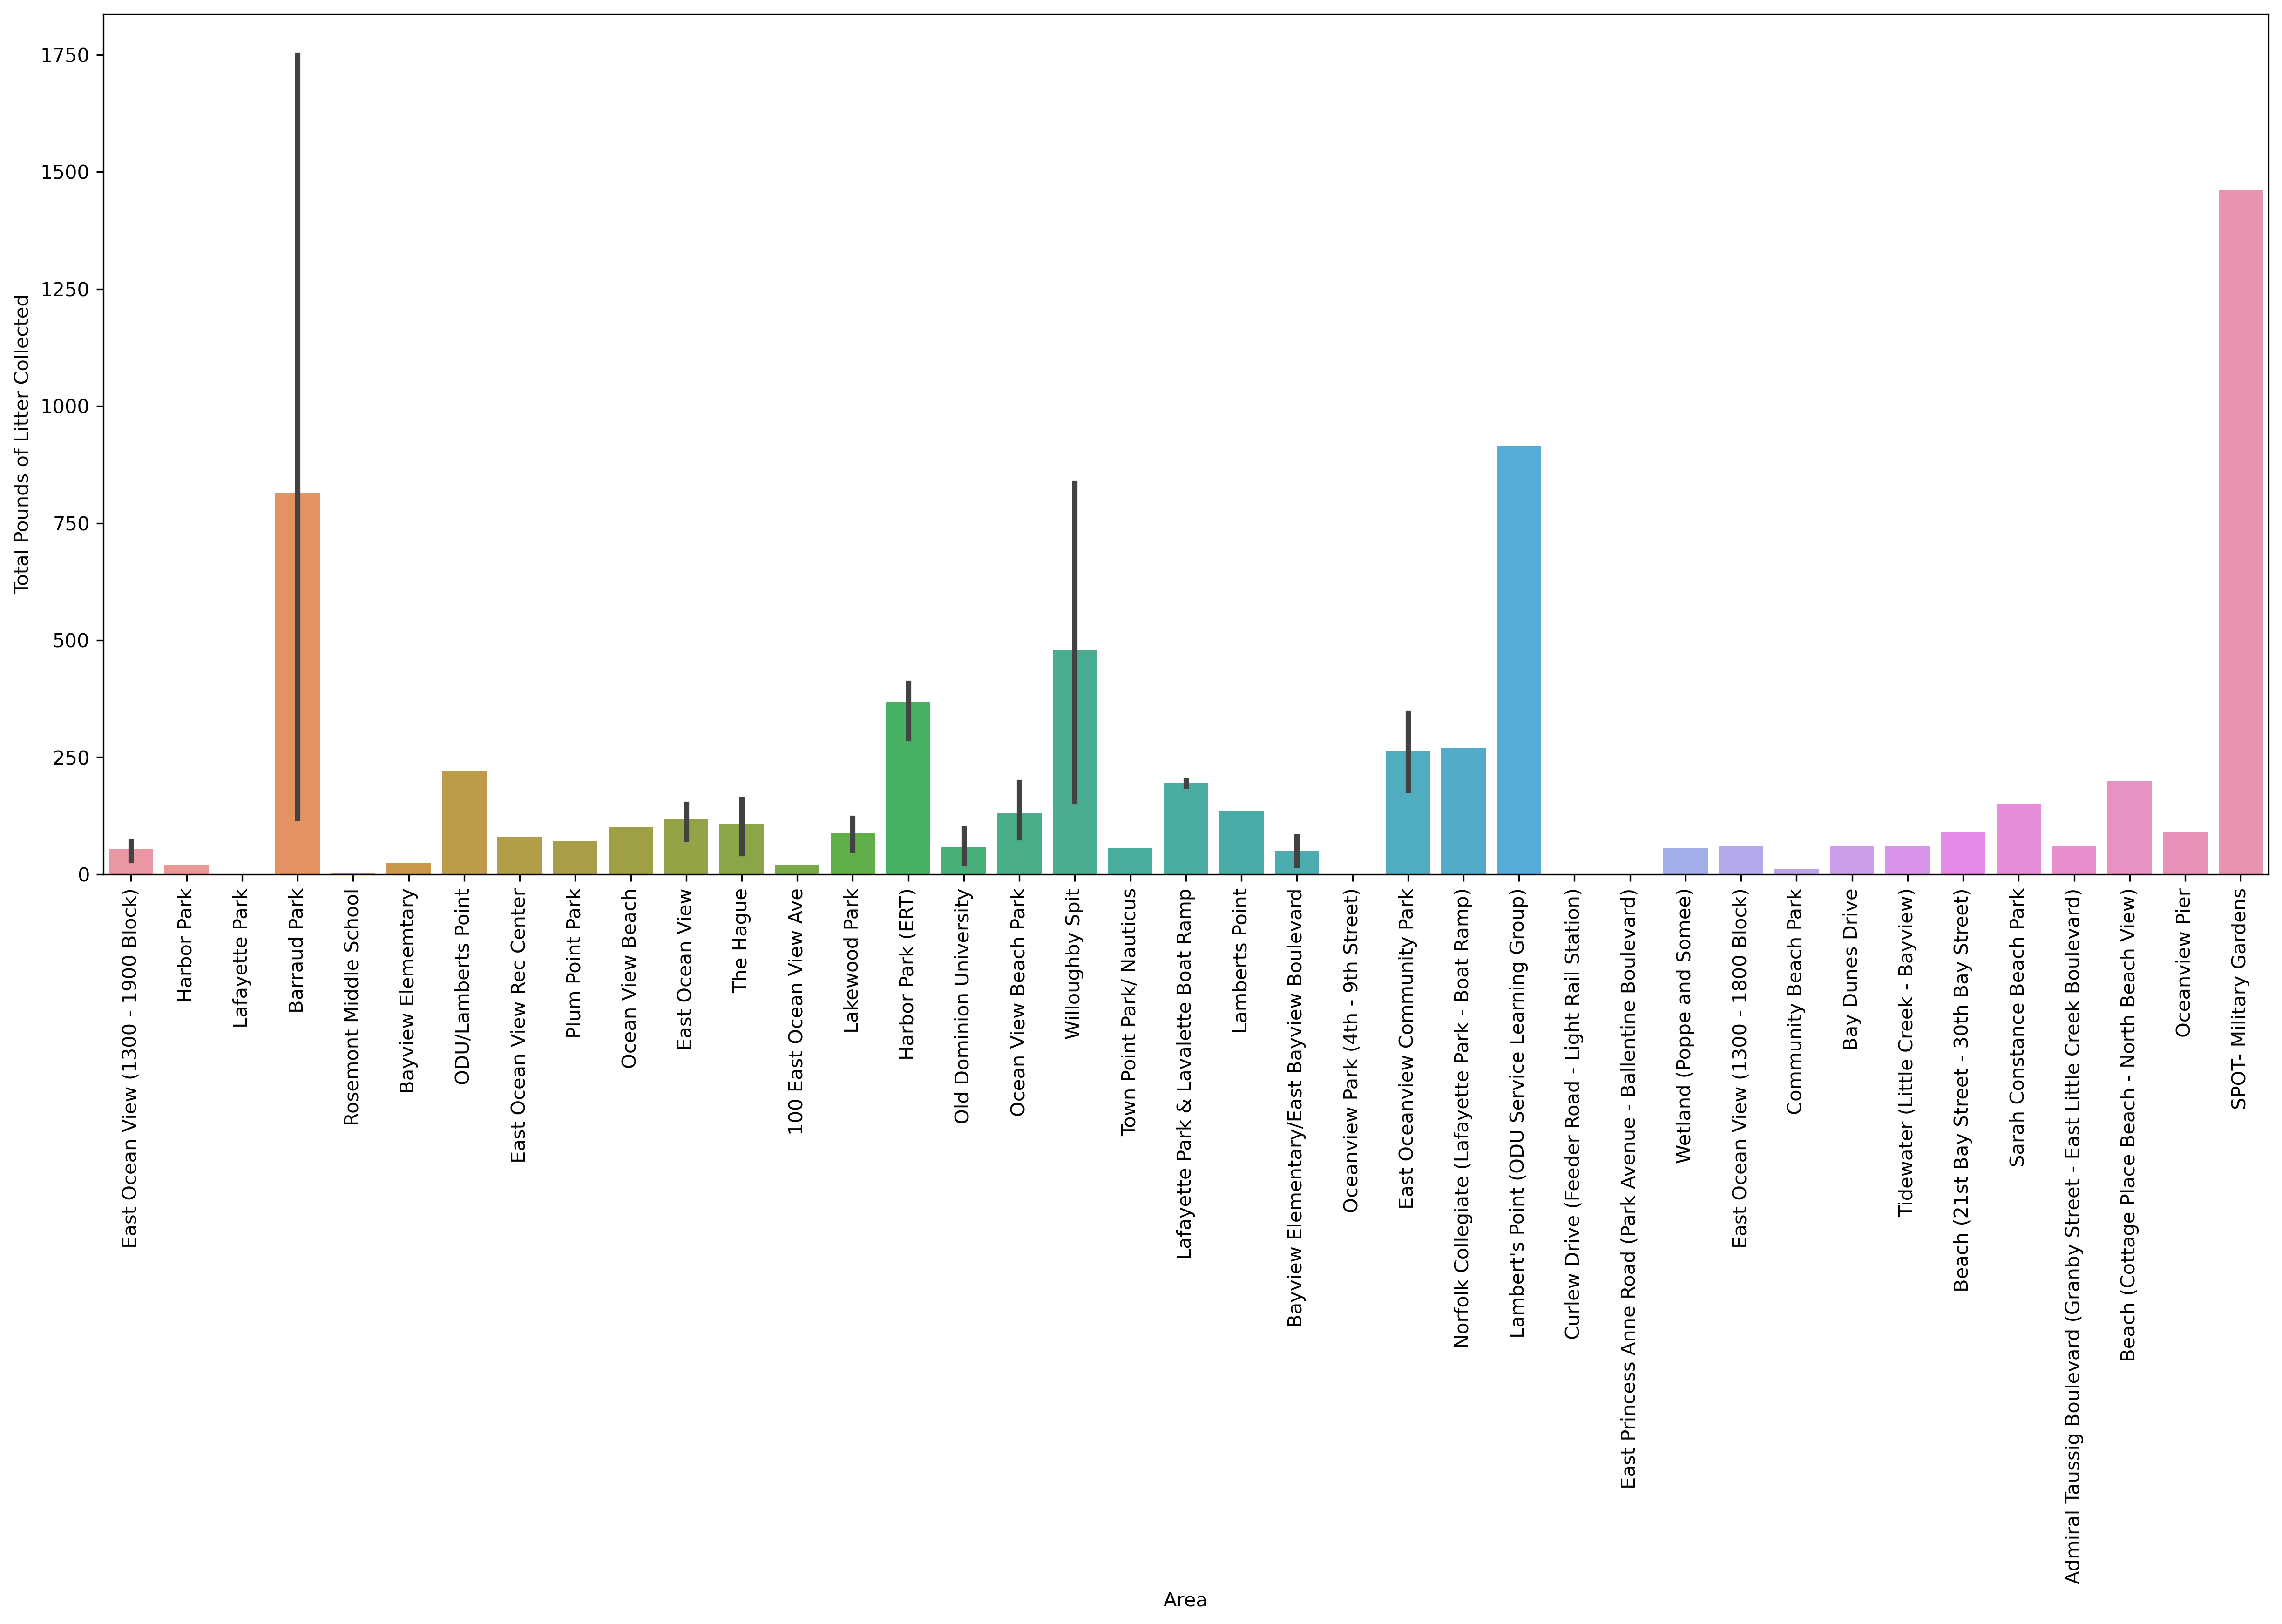

In [74]:
# Seems like high variation again between sites
# Now Plot Area and Number of volunteers to look at this more closely

fig, ax = plt.subplots(1, figsize = (20,8), dpi = 300)

sns.barplot(data = data, x = 'Area', y = data_no_commas['Total Pounds of Litter Collected'])
ax.tick_params(axis='x', rotation=90)

In [75]:
# Group by Area and volunteer hours to look at how many hours were typically spent at each area

data.groupby('Area')['Volunteer Hours'].unique()

Area
100 East Ocean View Ave                                                                              [10.0]
Admiral Taussig Boulevard (Granby Street - East Little Creek Boulevard)                              [20.0]
Barraud Park                                                               [52.5, 174.0, 43.5, 78.0, 396.0]
Bay Dunes Drive                                                                                       [9.0]
Bayview Elememtary                                                                                   [52.0]
Bayview Elementary/East Bayview Boulevard                                                 [5.0, 18.0, 28.0]
Beach (21st Bay Street - 30th Bay Street)                                                            [10.0]
Beach (Cottage Place Beach - North Beach View)                                                       [27.0]
Community Beach Park                                                                                  [6.0]
Curlew Drive (Feeder Ro

In [217]:
# Now look at mean 
data.groupby('Area')['Volunteer Hours'].mean()

Area
100 East Ocean View Ave                                                     10.000000
Admiral Taussig Boulevard (Granby Street - East Little Creek Boulevard)     20.000000
Barraud Park                                                               148.800000
Bay Dunes Drive                                                              9.000000
Bayview Elememtary                                                          52.000000
Bayview Elementary/East Bayview Boulevard                                   17.000000
Beach (21st Bay Street - 30th Bay Street)                                   10.000000
Beach (Cottage Place Beach - North Beach View)                              27.000000
Community Beach Park                                                         6.000000
Curlew Drive (Feeder Road - Light Rail Station)                              0.000000
East Ocean View                                                             22.500000
East Ocean View (1300 - 1800 Block)              

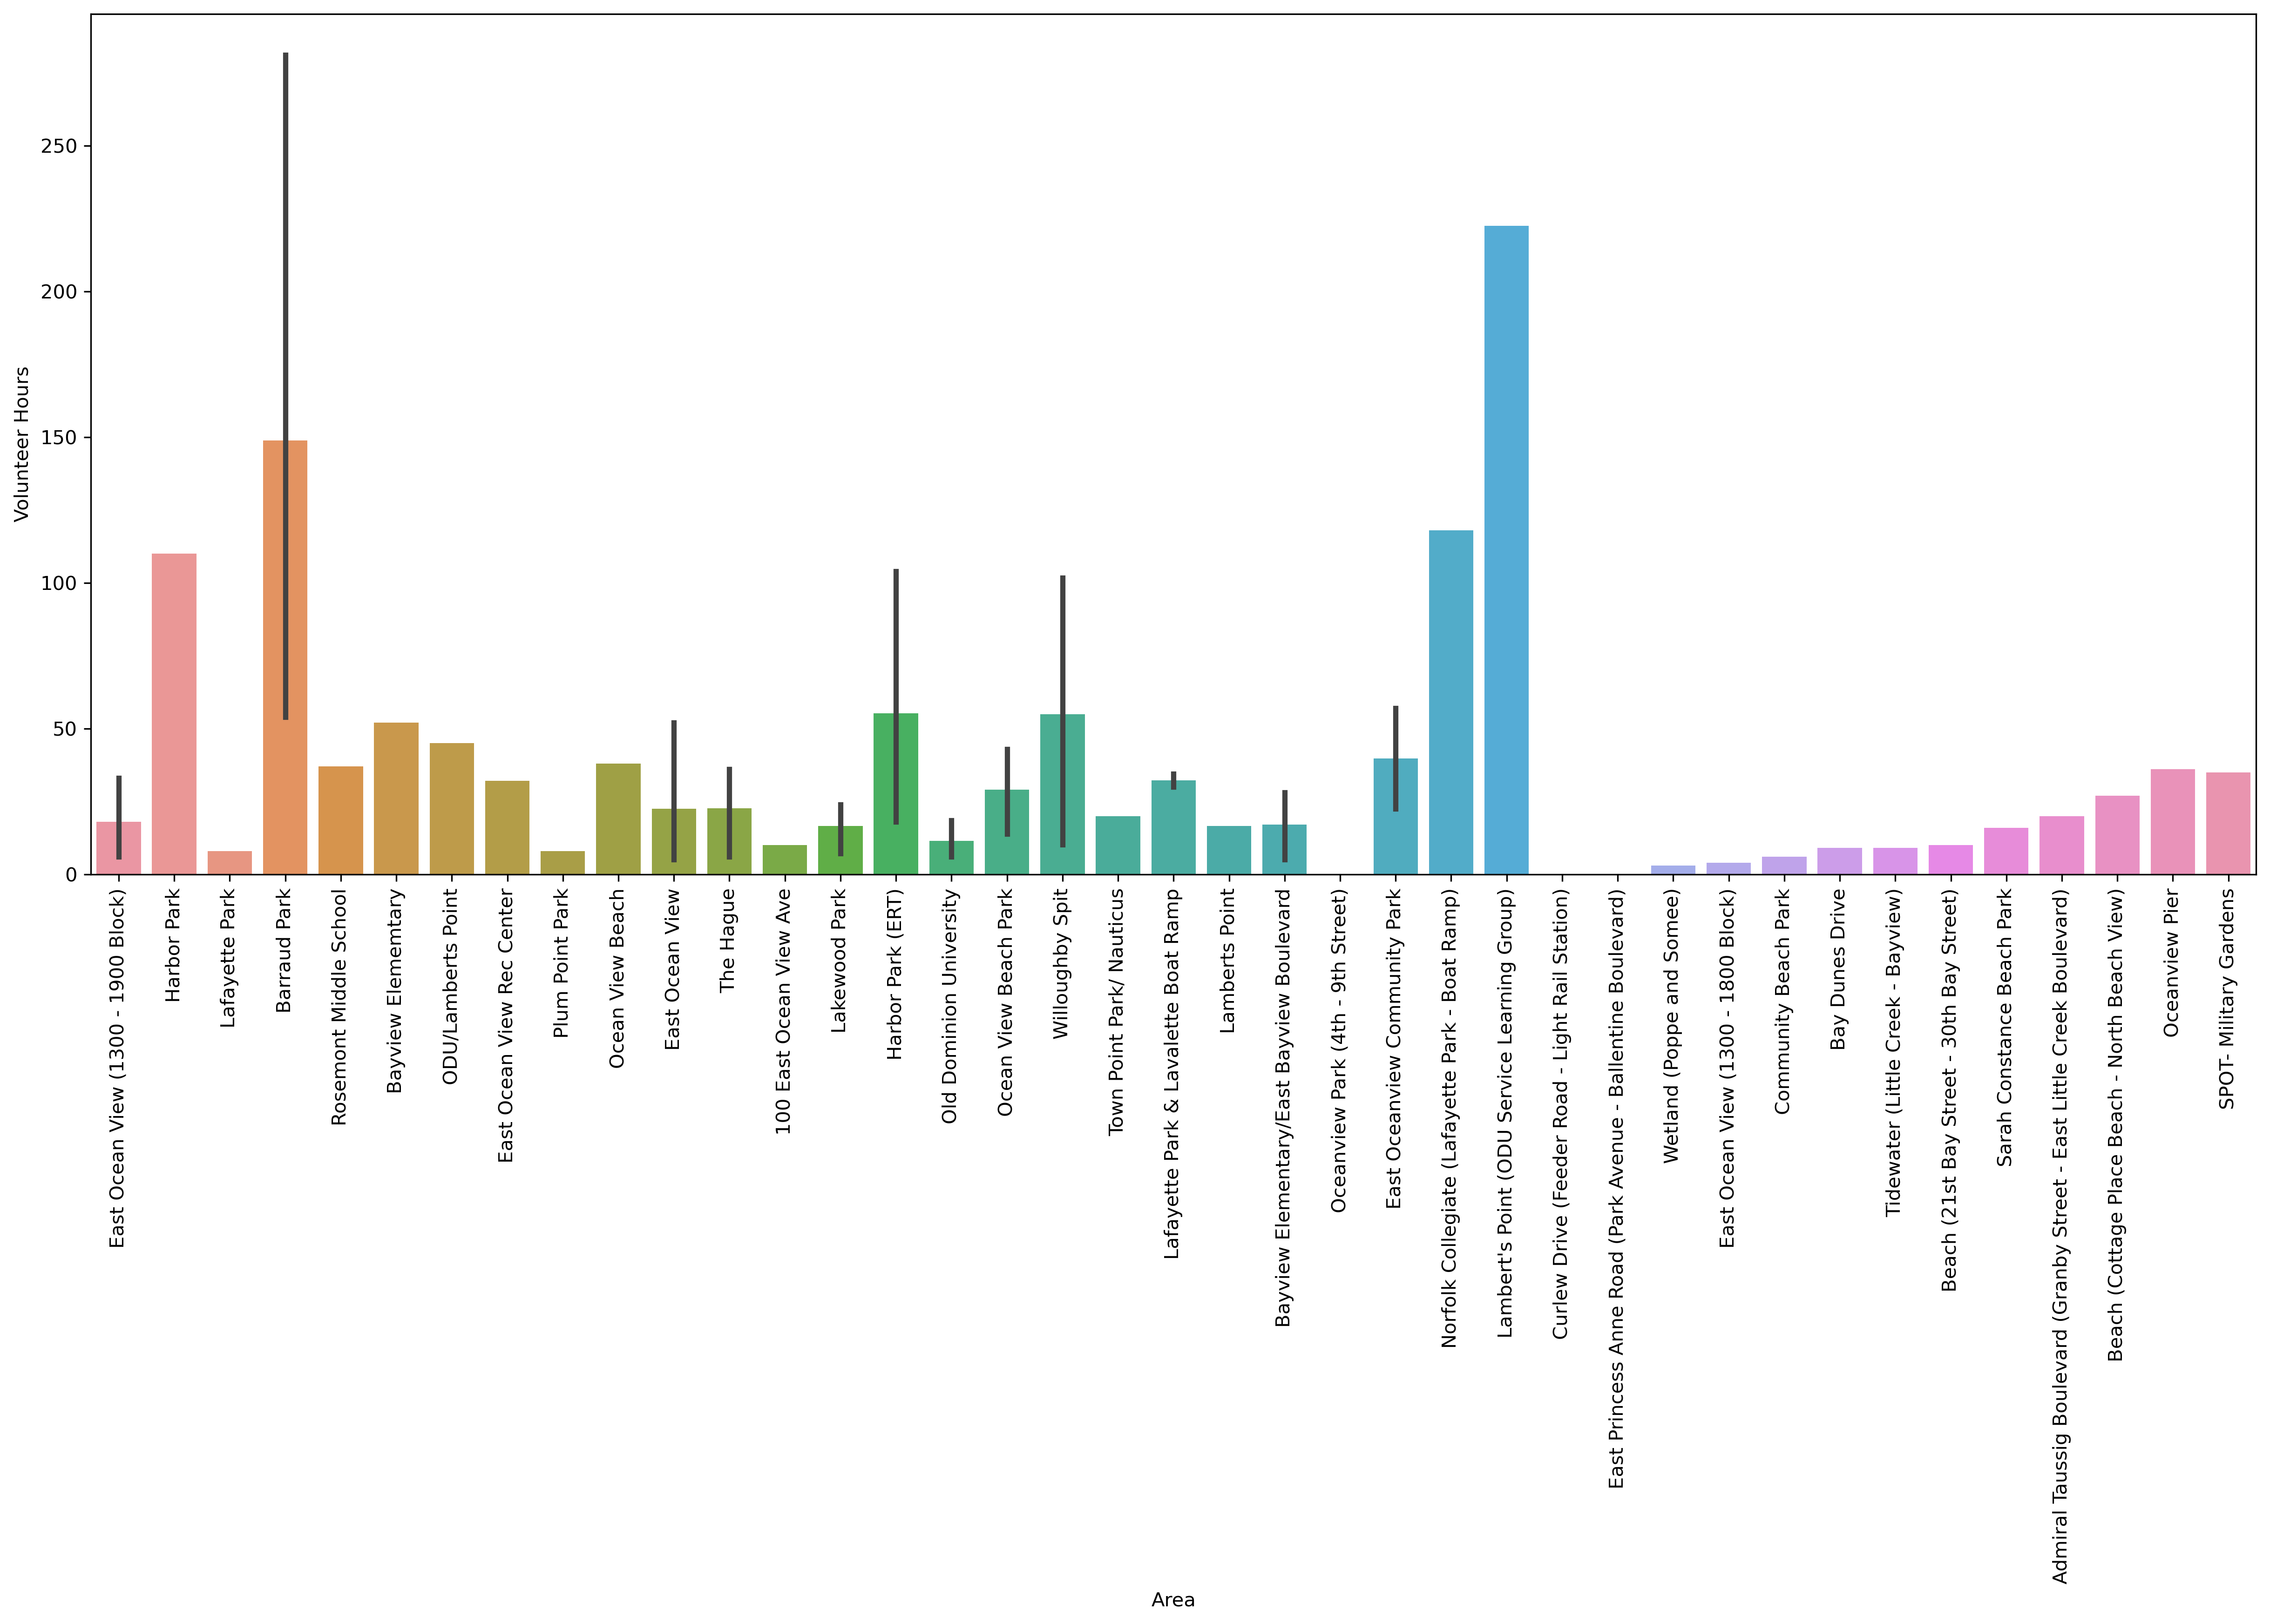

In [77]:
# High variation between sites again
# Now Plot Area and Number of volunteers to look at this more closely

fig, ax = plt.subplots(1, figsize = (20,8), dpi = 300)

sns.barplot(data = data, x = 'Area', y = 'Volunteer Hours')
ax.tick_params(axis='x', rotation=90)

In [118]:
# Switch 'Total Items Collected' column to interger now 
data_no_commas['Total Items Collected'] = pd.to_numeric(data_no_commas['Total Items Collected'])

In [116]:
#Confirm this worked
data_no_commas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Area                                       69 non-null     object 
 1   Date                                       69 non-null     object 
 2   Cigarette Butts                            69 non-null     object 
 3   Food Wrappers (candy, chips, etc.)         69 non-null     object 
 4   Take Out/Away Containers (Plastic)         69 non-null     int64  
 5   Take Out/Away Containers (Foam)            69 non-null     int64  
 6   Bottle Caps (Plastic)                      69 non-null     int64  
 7   Bottle Caps (Metal)                        69 non-null     object 
 8   Lids (Plastic)                             69 non-null     int64  
 9   Straws, Stirrers                           69 non-null     int64  
 10  Forks, Knives, Spoons       

In [94]:
# Examine correlations for key variables

data_no_commas[['Volunteer Hours','Total Pounds of Litter Collected','Number of Miles','Total Items Collected','Number of Volunteers']].corr()

,Volunteer Hours,Total Pounds of Litter Collected,Number of Miles,Total Items Collected,Number of Volunteers
Volunteer Hours,1.000000,0.838644,0.307353,0.811059,0.905432
Total Pounds of Litter Collected,0.838644,1.000000,0.217463,0.675153,0.674838
Number of Miles,0.307353,0.217463,1.000000,0.211835,0.522245
Total Items Collected,0.811059,0.675153,0.211835,1.000000,0.730600
Number of Volunteers,0.905432,0.674838,0.522245,0.730600,1.000000


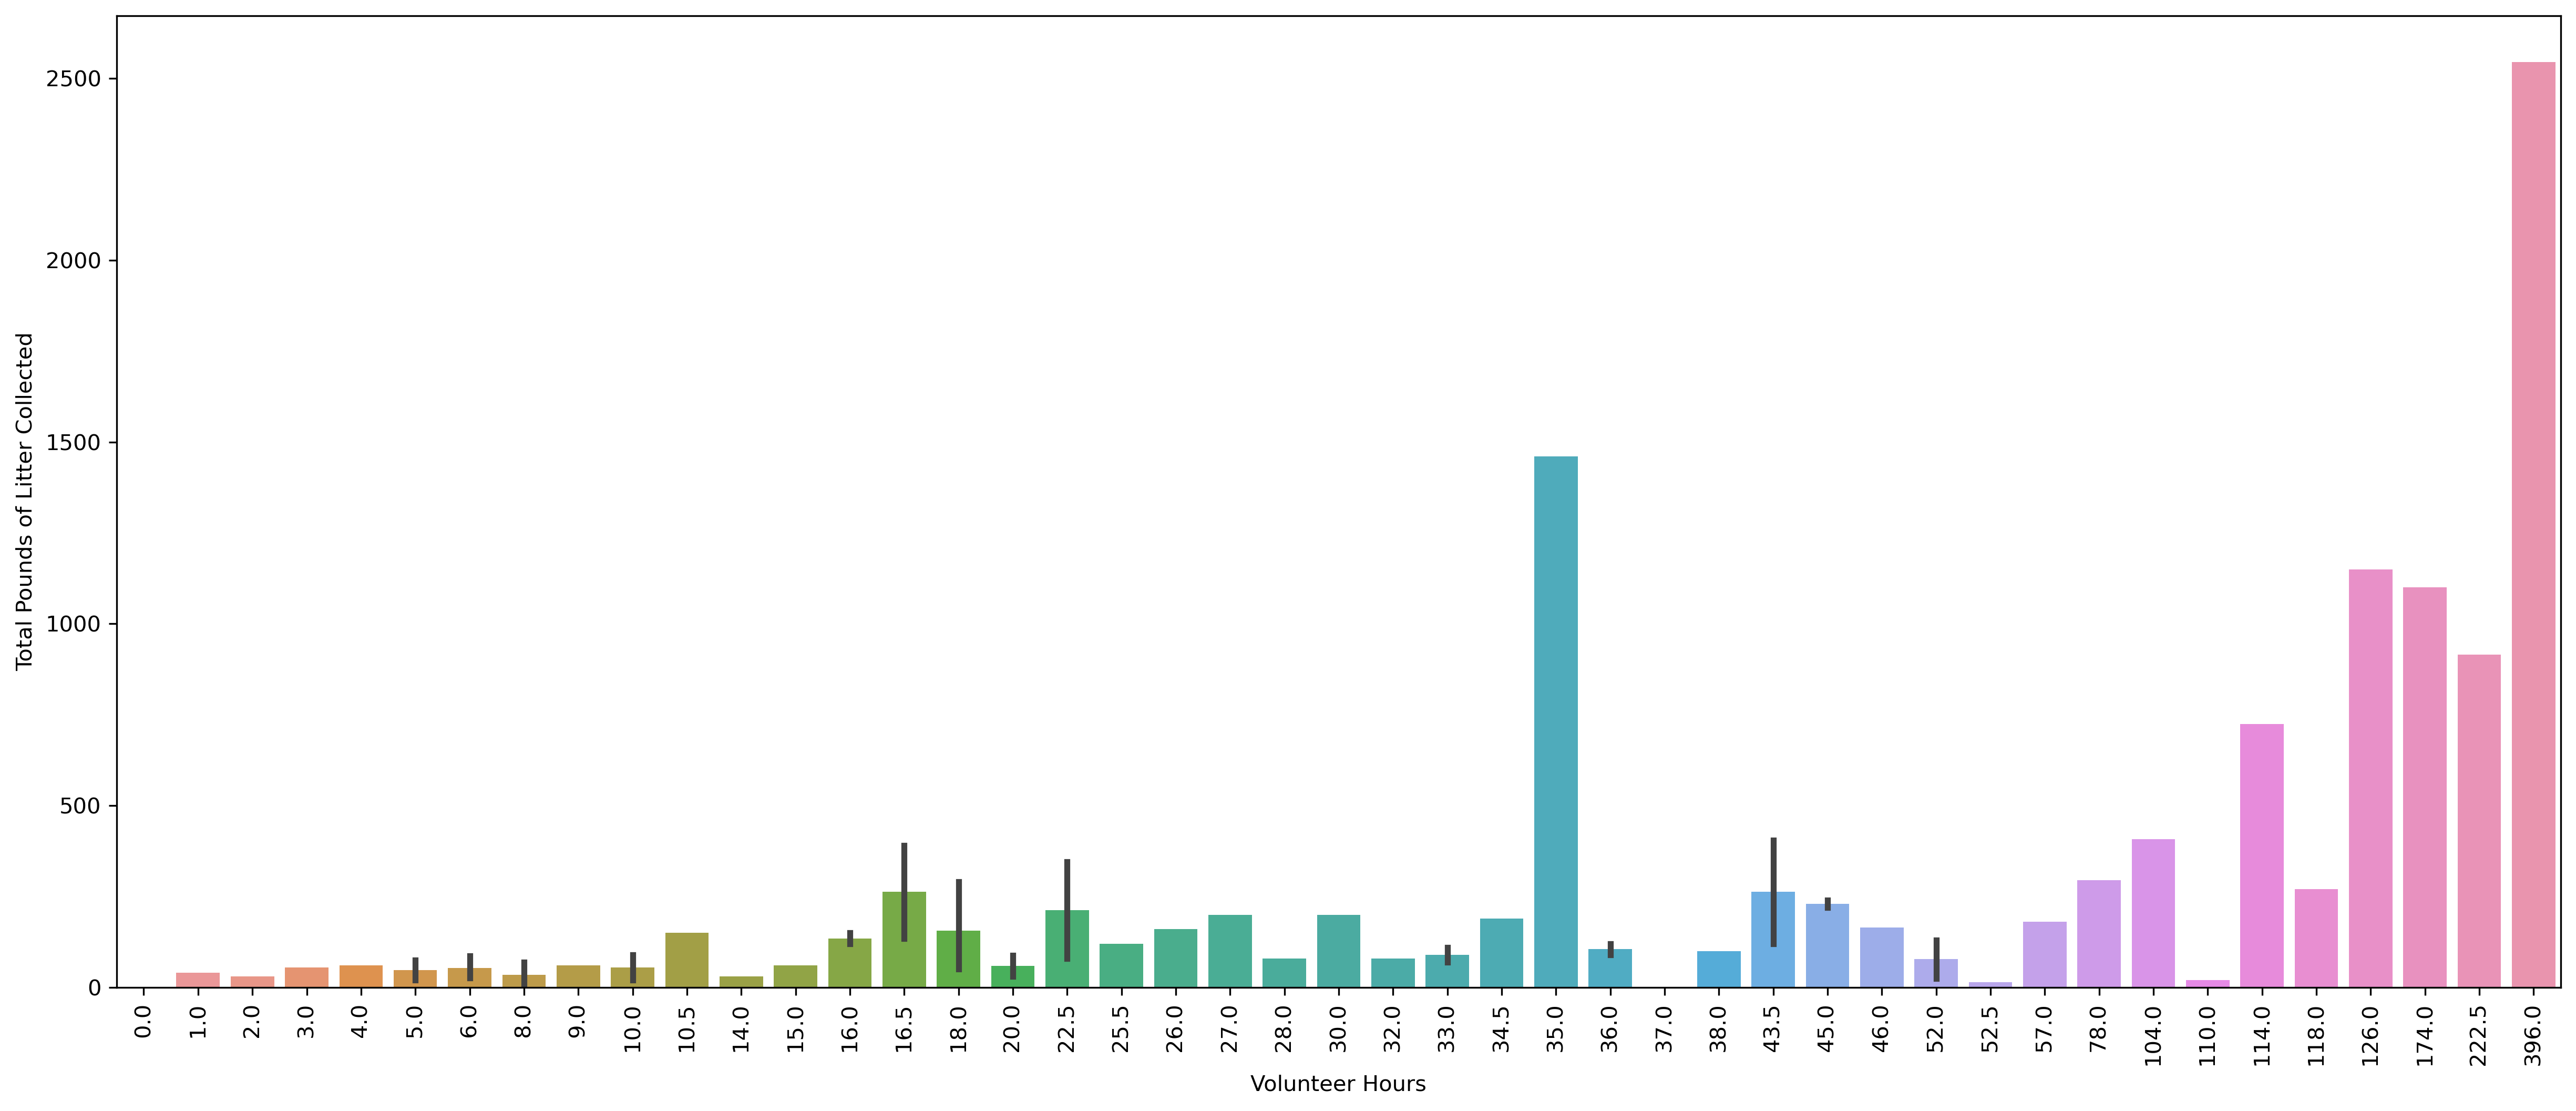

In [99]:
# Volunteer hours is highly correlated with total pounds of litter collected
# Now Plot Total Pounds of Litter Collected and Volunteer hours to look at this more closely

fig, ax = plt.subplots(1, figsize = (20,8), dpi = 300)

sns.barplot(data = data, x = 'Volunteer Hours', y = data_no_commas['Total Pounds of Litter Collected'])
ax.tick_params(axis='x', rotation=90)

In [103]:
# Whichever event had 35 volunteer hours seems to be an outlier
# Find which row this is with 35 hours
data_no_commas['Volunteer Hours'] == 35

0     False
1     False
2     False
3     False
4     False
      ...  
64    False
65    False
66    False
67     True
68    False
Name: Volunteer Hours, Length: 69, dtype: bool

In [106]:
## Display this row 
display(data.iloc[67])

Area                                         SPOT- Military Gardens
Date                                                     09/30/2016
Cigarette Butts                                                  63
Food Wrappers (candy, chips, etc.)                                2
Take Out/Away Containers (Plastic)                                0
Take Out/Away Containers (Foam)                                   0
Bottle Caps (Plastic)                                             9
Bottle Caps (Metal)                                               0
Lids (Plastic)                                                    0
Straws, Stirrers                                                  2
Forks, Knives, Spoons                                             1
Beverage Bottles (Plastic)                                        0
Beverage Bottles (Glass)                                          0
Beverage Cans                                                     2
Grocery Bags (Plastic)                          

In [108]:
# This outlier seems to be highly influenced by whatever "other trash (clean swell)" entails 
# Focus on events with high volunteer hours to see what items seem to be contributing the most to total weight
# Create new dataframe with only high volunteer hours
Data_High_Hours=data_no_commas.loc[data_no_commas['Volunteer Hours'] > 111]

In [109]:
#Examine new dataframe
Data_High_Hours.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 13 to 68
Data columns (total 53 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Area                                       6 non-null      object 
 1   Date                                       6 non-null      object 
 2   Cigarette Butts                            6 non-null      object 
 3   Food Wrappers (candy, chips, etc.)         6 non-null      object 
 4   Take Out/Away Containers (Plastic)         6 non-null      int64  
 5   Take Out/Away Containers (Foam)            6 non-null      int64  
 6   Bottle Caps (Plastic)                      6 non-null      int64  
 7   Bottle Caps (Metal)                        6 non-null      object 
 8   Lids (Plastic)                             6 non-null      int64  
 9   Straws, Stirrers                           6 non-null      int64  
 10  Forks, Knives, Spoons       

In [113]:
# Examine correlations for key variables in new dataframe
Data_High_Hours[['Volunteer Hours','Total Pounds of Litter Collected','Number of Miles','Total Items Collected','Number of Volunteers']].corr()

,Volunteer Hours,Total Pounds of Litter Collected,Number of Miles,Total Items Collected,Number of Volunteers
Volunteer Hours,1.000000,0.903810,0.091927,0.904117,0.690199
Total Pounds of Litter Collected,0.903810,1.000000,-0.134889,0.822447,0.408358
Number of Miles,0.091927,-0.134889,1.000000,-0.000169,0.761396
Total Items Collected,0.904117,0.822447,-0.000169,1.000000,0.596530
Number of Volunteers,0.690199,0.408358,0.761396,0.596530,1.000000


In [125]:
# This seems to have increased correlation between total items and total pounds 
# Perfect for now exploring which items contribute most to weight

# Display rows to look at what type of trash seems to be contributing the most
display(Data_High_Hours.iloc[0:6])

,Area,Date,Cigarette Butts,"Food Wrappers (candy, chips, etc.)",Take Out/Away Containers (Plastic),Take Out/Away Containers (Foam),Bottle Caps (Plastic),Bottle Caps (Metal),Lids (Plastic),"Straws, Stirrers",...,Tampons/Tampon Applicators,Personal Hygiene (Clean Swell),Foam Pieces,Glass Pieces,Plastic Pieces,Total Items Collected,Total Pounds of Litter Collected,Number of Volunteers,Volunteer Hours,Number of Miles
13,Barraud Park,10/16/2021,2724,778,18,21,780,4332,77,368,...,1,3,47,754,1347,13269.5,1100,87,174.0,3.0
48,Willoughby Spit,09/30/2017,252,66,29,29,87,60,58,72,...,5,0,81,198,270,2093.0,725,38,114.0,1.0
49,Norfolk Collegiate (Lafayette Park - Boat Ramp),09/30/2017,618,607,27,34,285,200,50,95,...,8,0,54,217,711,4037.0,270,59,118.0,1.0
50,Barraud Park,09/30/2017,3639,1203,40,106,549,6269,79,106,...,0,0,528,2806,1051,20544.0,2545,132,396.0,1.0
52,Lambert's Point (ODU Service Learning Group),09/30/2017,1003,944,80,46,214,160,109,166,...,14,33,156,1112,1458,7892.0,915,178,222.5,10.0
68,Willoughby Spit,09/30/2016,386,59,41,25,127,0,93,146,...,0,59,0,0,289,1918.0,1150,42,126.0,2.0


In [128]:
# Convert Glass Pieces to numeric
Data_High_Hours['Glass Pieces'] = pd.to_numeric(Data_High_Hours['Glass Pieces'])

C:\Users\zacha\AppData\Local\Temp\ipykernel_19172\2840643082.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_High_Hours['Glass Pieces'] = pd.to_numeric(Data_High_Hours['Glass Pieces'])


In [133]:
# Convert Beverage Bottles (Glass) to numeric
Data_High_Hours['Beverage Bottles (Glass)'] = pd.to_numeric(Data_High_Hours['Beverage Bottles (Glass)'])

C:\Users\zacha\AppData\Local\Temp\ipykernel_19172\4202989399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_High_Hours['Beverage Bottles (Glass)'] = pd.to_numeric(Data_High_Hours['Beverage Bottles (Glass)'])


In [ ]:
# Convert Plastic Pieces to numeric
Data_High_Hours['Plastic Pieces'] = pd.to_numeric(Data_High_Hours['Plastic Pieces'])

In [134]:
# After finding key trash items, examine correlations 
Data_High_Hours[['Total Pounds of Litter Collected','Glass Pieces','Beverage Bottles (Glass)','Other Trash (Clean Swell)',
                'Plastic Pieces']].corr()

,Total Pounds of Litter Collected,Glass Pieces,Beverage Bottles (Glass),Other Trash (Clean Swell),Plastic Pieces
Total Pounds of Litter Collected,1.000000,0.873751,0.917605,-0.108975,0.243642
Glass Pieces,0.873751,1.000000,0.940687,-0.115514,0.538177
Beverage Bottles (Glass),0.917605,0.940687,1.000000,-0.235968,0.233981
Other Trash (Clean Swell),-0.108975,-0.115514,-0.235968,1.000000,0.225025
Plastic Pieces,0.243642,0.538177,0.233981,0.225025,1.000000


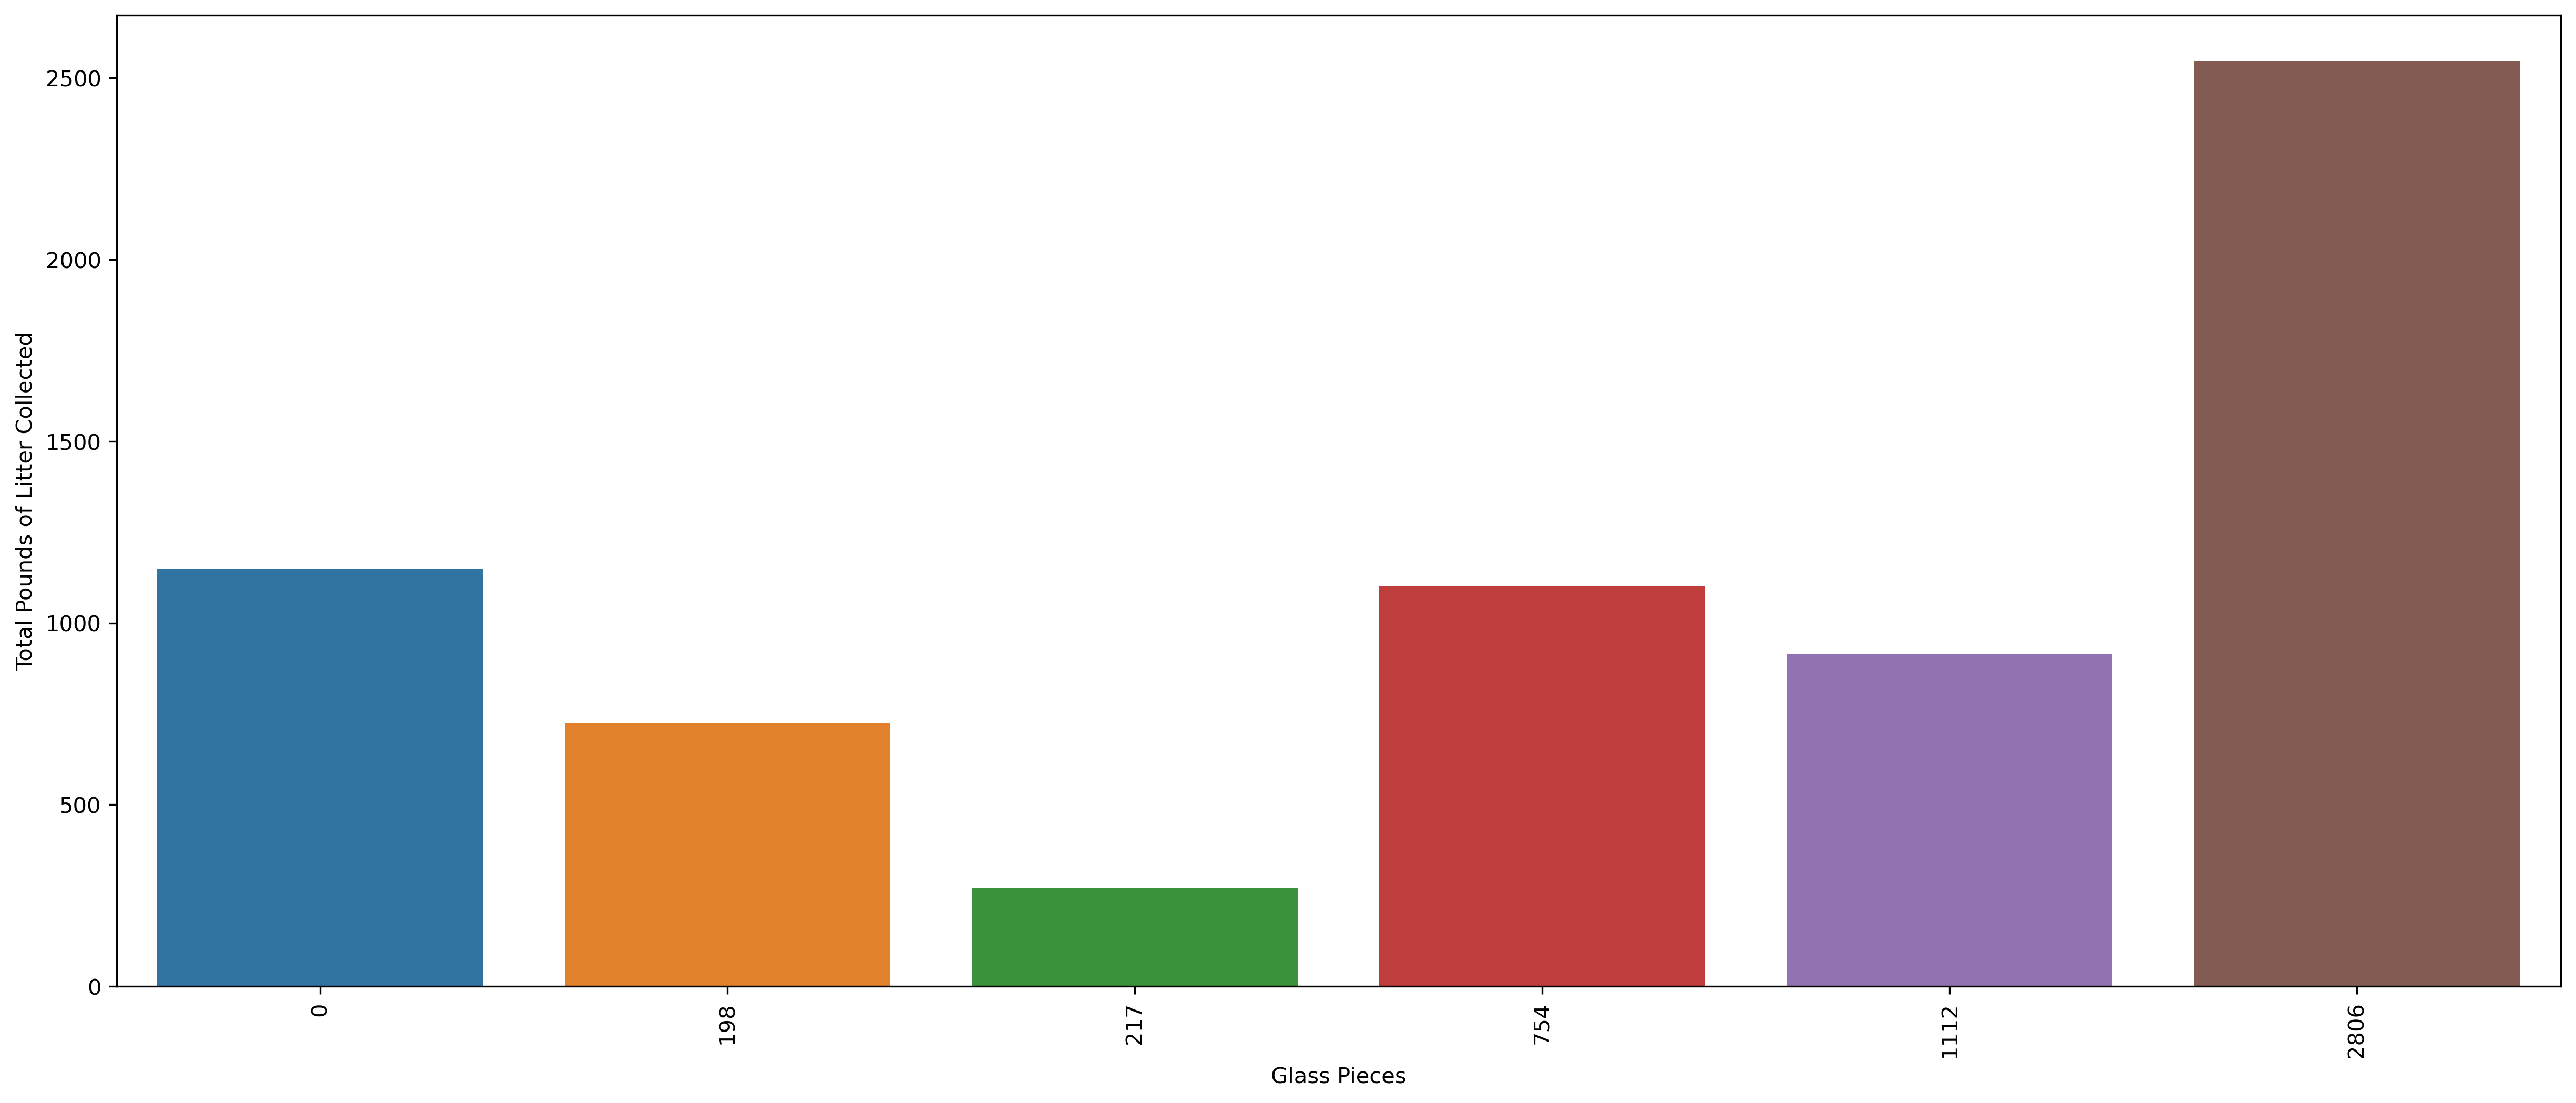

In [137]:
# Seems like glass piece4s and glass bottles contribute the most total weight

# Now Plot Total Pounds of Litter Collected and glass pieces to look at this more closely

fig, ax = plt.subplots(1, figsize = (20,8), dpi = 300)

sns.barplot(data = Data_High_Hours, x = 'Glass Pieces', y = Data_High_Hours['Total Pounds of Litter Collected'])
ax.tick_params(axis='x', rotation=90)

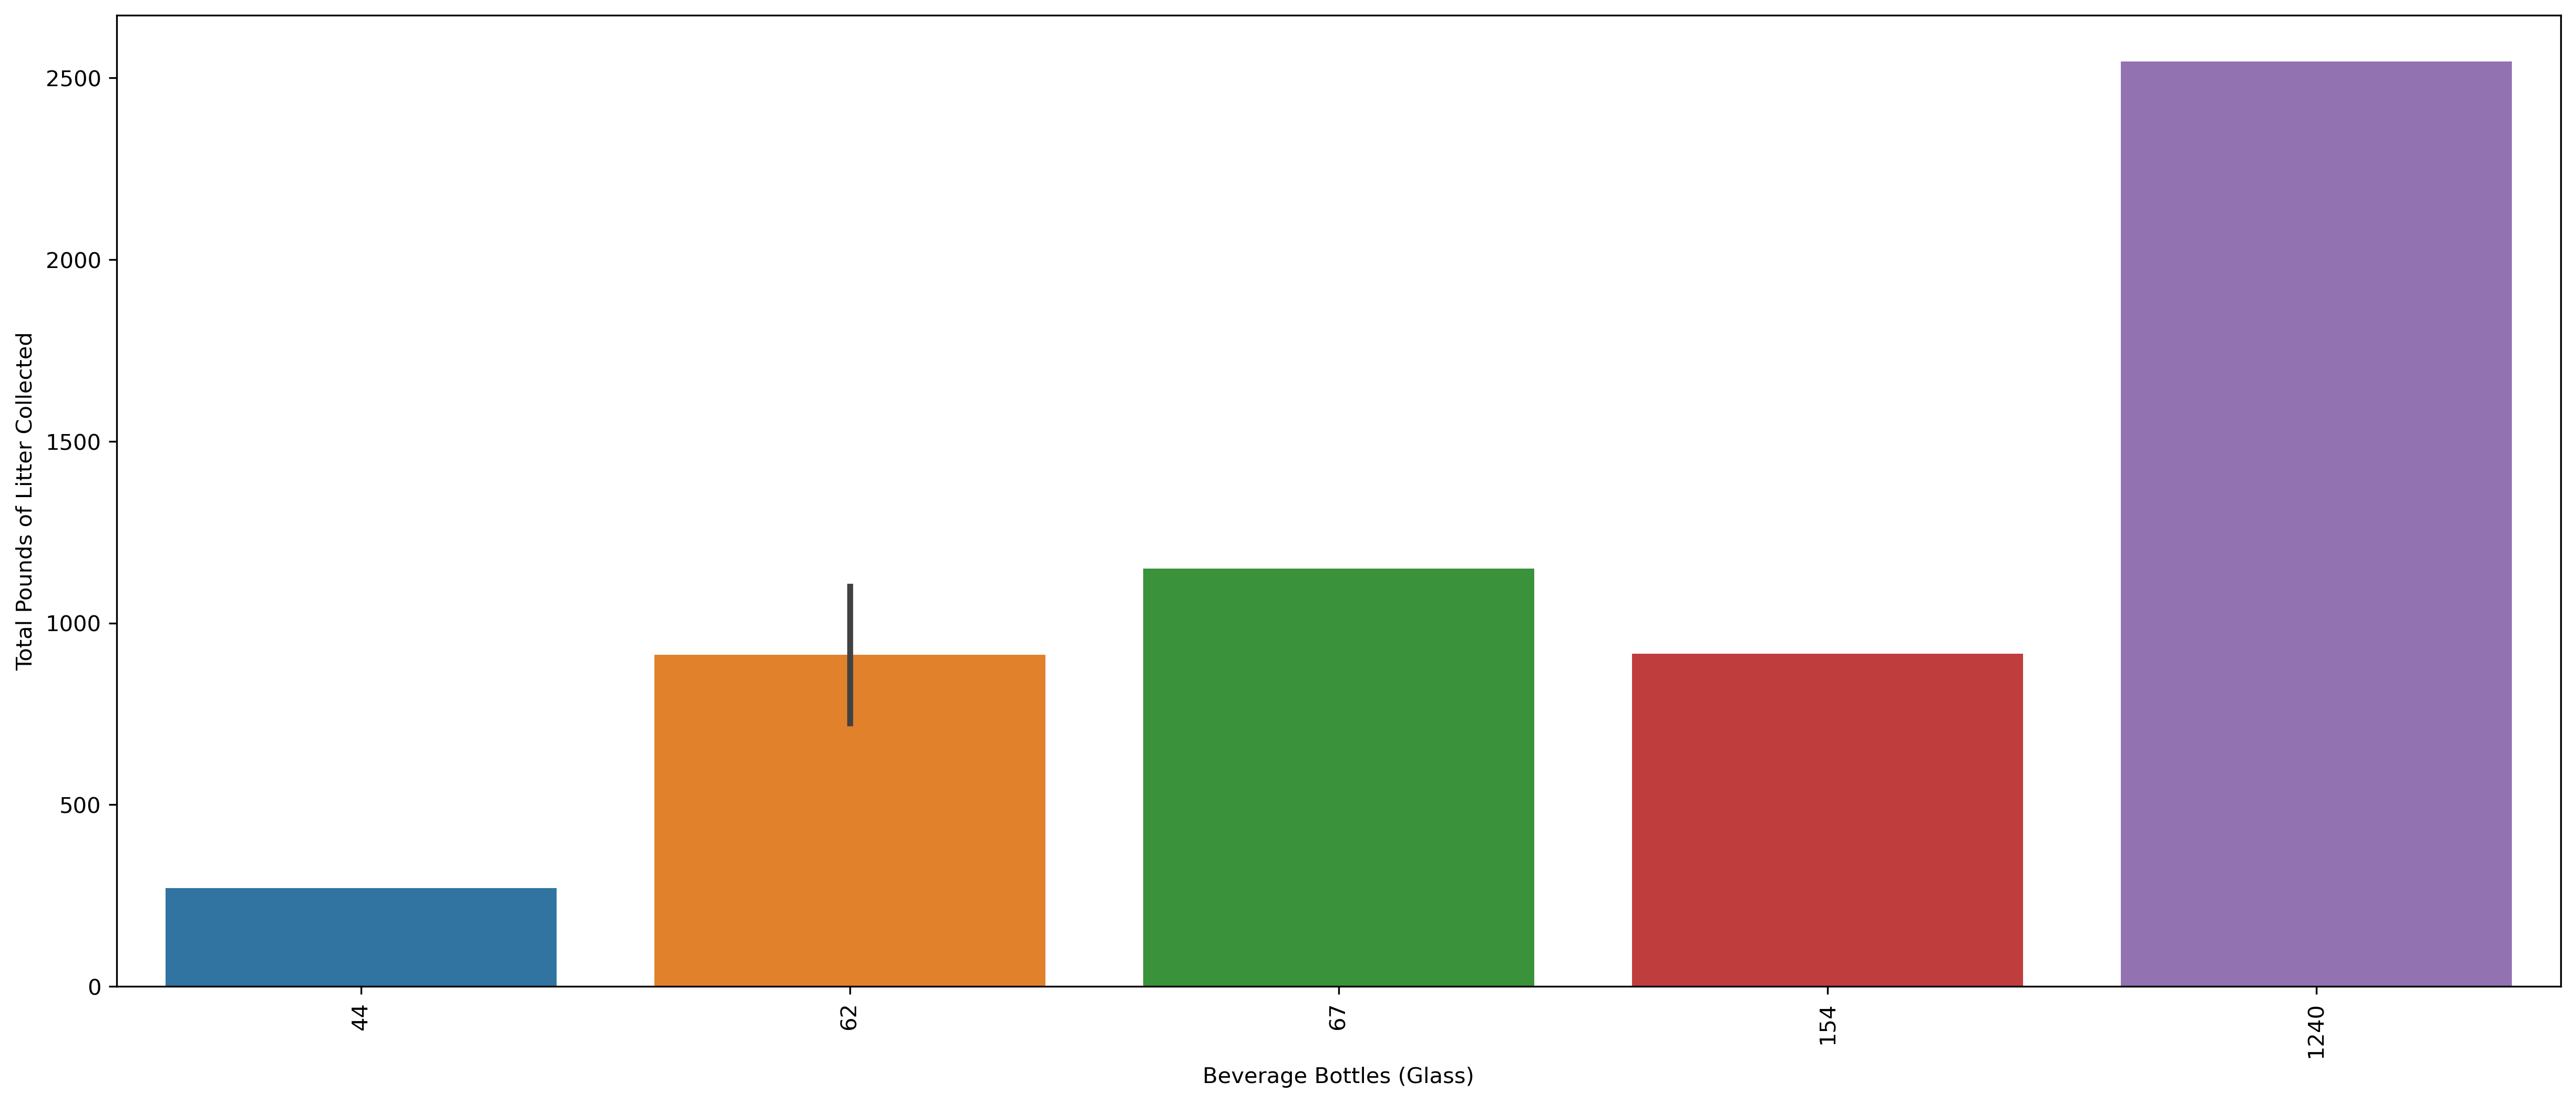

In [138]:
# Now Plot Total Pounds of Litter Collected and glass bottles to look at this more closely

fig, ax = plt.subplots(1, figsize = (20,8), dpi = 300)

sns.barplot(data = Data_High_Hours, x = 'Beverage Bottles (Glass)', y = Data_High_Hours['Total Pounds of Litter Collected'])
ax.tick_params(axis='x', rotation=90)

In [ ]:
# get a list of the unique Dates
data_no_commas['Date'].unique()

In [193]:
#Create new columns for each year that events occurred

data_no_commas["2022"] = data_no_commas["Date"].str.endswith("2022").astype(int)
data_no_commas["2021"] = data_no_commas["Date"].str.endswith("2021").astype(int)
data_no_commas["2020"] = data_no_commas["Date"].str.endswith("2020").astype(int)
data_no_commas["2019"] = data_no_commas["Date"].str.endswith("2019").astype(int)
data_no_commas["2018"] = data_no_commas["Date"].str.endswith("2018").astype(int)
data_no_commas["2017"] = data_no_commas["Date"].str.endswith("2017").astype(int)
data_no_commas["2016"] = data_no_commas["Date"].str.endswith("2016").astype(int)

In [194]:
# Look at total number of events in 2022
data_no_commas['2022'].sum()

10

In [195]:
# 10 total events in 2022
# Look at average weight of trash removed in 2022
data_no_commas.groupby('2022')['Total Pounds of Litter Collected'].mean()

2022
0    242.677966
1     60.200000
Name: Total Pounds of Litter Collected, dtype: float64

In [218]:
# 60.2 lb. average in 2022
# Look at sum of trash removed in 2022
data_no_commas.groupby('2022')['Total Pounds of Litter Collected'].sum()

2022
0    14318
1      602
Name: Total Pounds of Litter Collected, dtype: int64

In [196]:
# 602 lb. total removed in 2022
# Look at total number of events in 2021
data_no_commas['2021'].sum()

11

In [197]:
# 11 total events in 2021
# Look at average weight of trash removed in 2021
data_no_commas.groupby('2021')['Total Pounds of Litter Collected'].mean()

2021
0    217.534483
1    209.363636
Name: Total Pounds of Litter Collected, dtype: float64

In [219]:
# 209.4 lb. average in 2021
# Look at sum of trash removed in 2021
data_no_commas.groupby('2021')['Total Pounds of Litter Collected'].sum()

2021
0    12617
1     2303
Name: Total Pounds of Litter Collected, dtype: int64

In [199]:
# 2303 lb. total removed in 2021
# Look at total number of events in 2020
data_no_commas['2020'].sum()

0

In [200]:
# No cleanups in 2020 
# Skip to 2019 
# Look at total number of events in 2019
data_no_commas['2019'].sum()

11

In [222]:
# 11 total events in 2019
# Look at average weight of trash removed in 2019
data_no_commas.groupby('2019')['Total Pounds of Litter Collected'].mean()

2019
0    235.879310
1    112.636364
Name: Total Pounds of Litter Collected, dtype: float64

In [221]:
# 112.6 lb. average in 2019
# Look at sum of trash removed in 2019
data_no_commas.groupby('2019')['Total Pounds of Litter Collected'].sum()

2019
0    13681
1     1239
Name: Total Pounds of Litter Collected, dtype: int64

In [203]:
# 1239 lb. total removed in 2019
# Look at total number of events in 2018
data_no_commas['2018'].sum()

10

In [223]:
# 10 total events in 2018
# Look at average weight of trash removed in 2018
data_no_commas.groupby('2018')['Total Pounds of Litter Collected'].mean()

2018
0    222.813559
1    177.400000
Name: Total Pounds of Litter Collected, dtype: float64

In [224]:
# 177.4 lb. average in 2018
# Look at sum of trash removed in 2018
data_no_commas.groupby('2018')['Total Pounds of Litter Collected'].sum()

2018
0    13146
1     1774
Name: Total Pounds of Litter Collected, dtype: int64

In [205]:
# 1774 lb. total removed in 2018
# Look at total number of events in 2017
data_no_commas['2017'].sum()

11

In [225]:
# 11 total events in 2017
# Look at average weight of trash removed in 2017
data_no_commas.groupby('2017')['Total Pounds of Litter Collected'].mean()

2017
0    168.706897
1    466.818182
Name: Total Pounds of Litter Collected, dtype: float64

In [226]:
# 466.8 lb. average in 2017
# Look at sum of trash removed in 2017
data_no_commas.groupby('2017')['Total Pounds of Litter Collected'].sum()

2017
0    9785
1    5135
Name: Total Pounds of Litter Collected, dtype: int64

In [207]:
# 5135 lb. total removed in 2017
# Look at total number of events in 2016
data_no_commas['2016'].sum()

16

In [227]:
# 16 total events in 2016
# Look at average weight of trash removed in 2016
data_no_commas.groupby('2016')['Total Pounds of Litter Collected'].mean()

2016
0    208.54717
1    241.68750
Name: Total Pounds of Litter Collected, dtype: float64

In [228]:
# 241.7 lb. average in 2016
# Look at sum of trash removed in 2016
data_no_commas.groupby('2016')['Total Pounds of Litter Collected'].sum()

2016
0    11053
1     3867
Name: Total Pounds of Litter Collected, dtype: int64

In [ ]:
# 3867 lb. total removed in 2017

## Final Summary 

# 2016 had the most cleanups - 16
# 2017 was the most effective year for cleanups in terms of average per cleanup (466.8 lb.) and total (5135 lb.)
# 2020 had no cleanups - likely do to the global pandemic
# 4 cleanup events had no volunteers show up
# SPOT- Military Gardens event on  09/30/2016 likely an outlier
# Glass bottles and glass pieces seemed to contribute the most to total weight 
# Total weight removed was most influenced by volunteer hours - although this was most noticeable >100 hours 
# Area covered (Number of miles) seemed to have marginal influence on total weight collected
# 39 different sites were visited for cleanups - does not appear that site had much of an influence of total weight collected